[View in Colaboratory](https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/1twoD_linear_regression.ipynb)

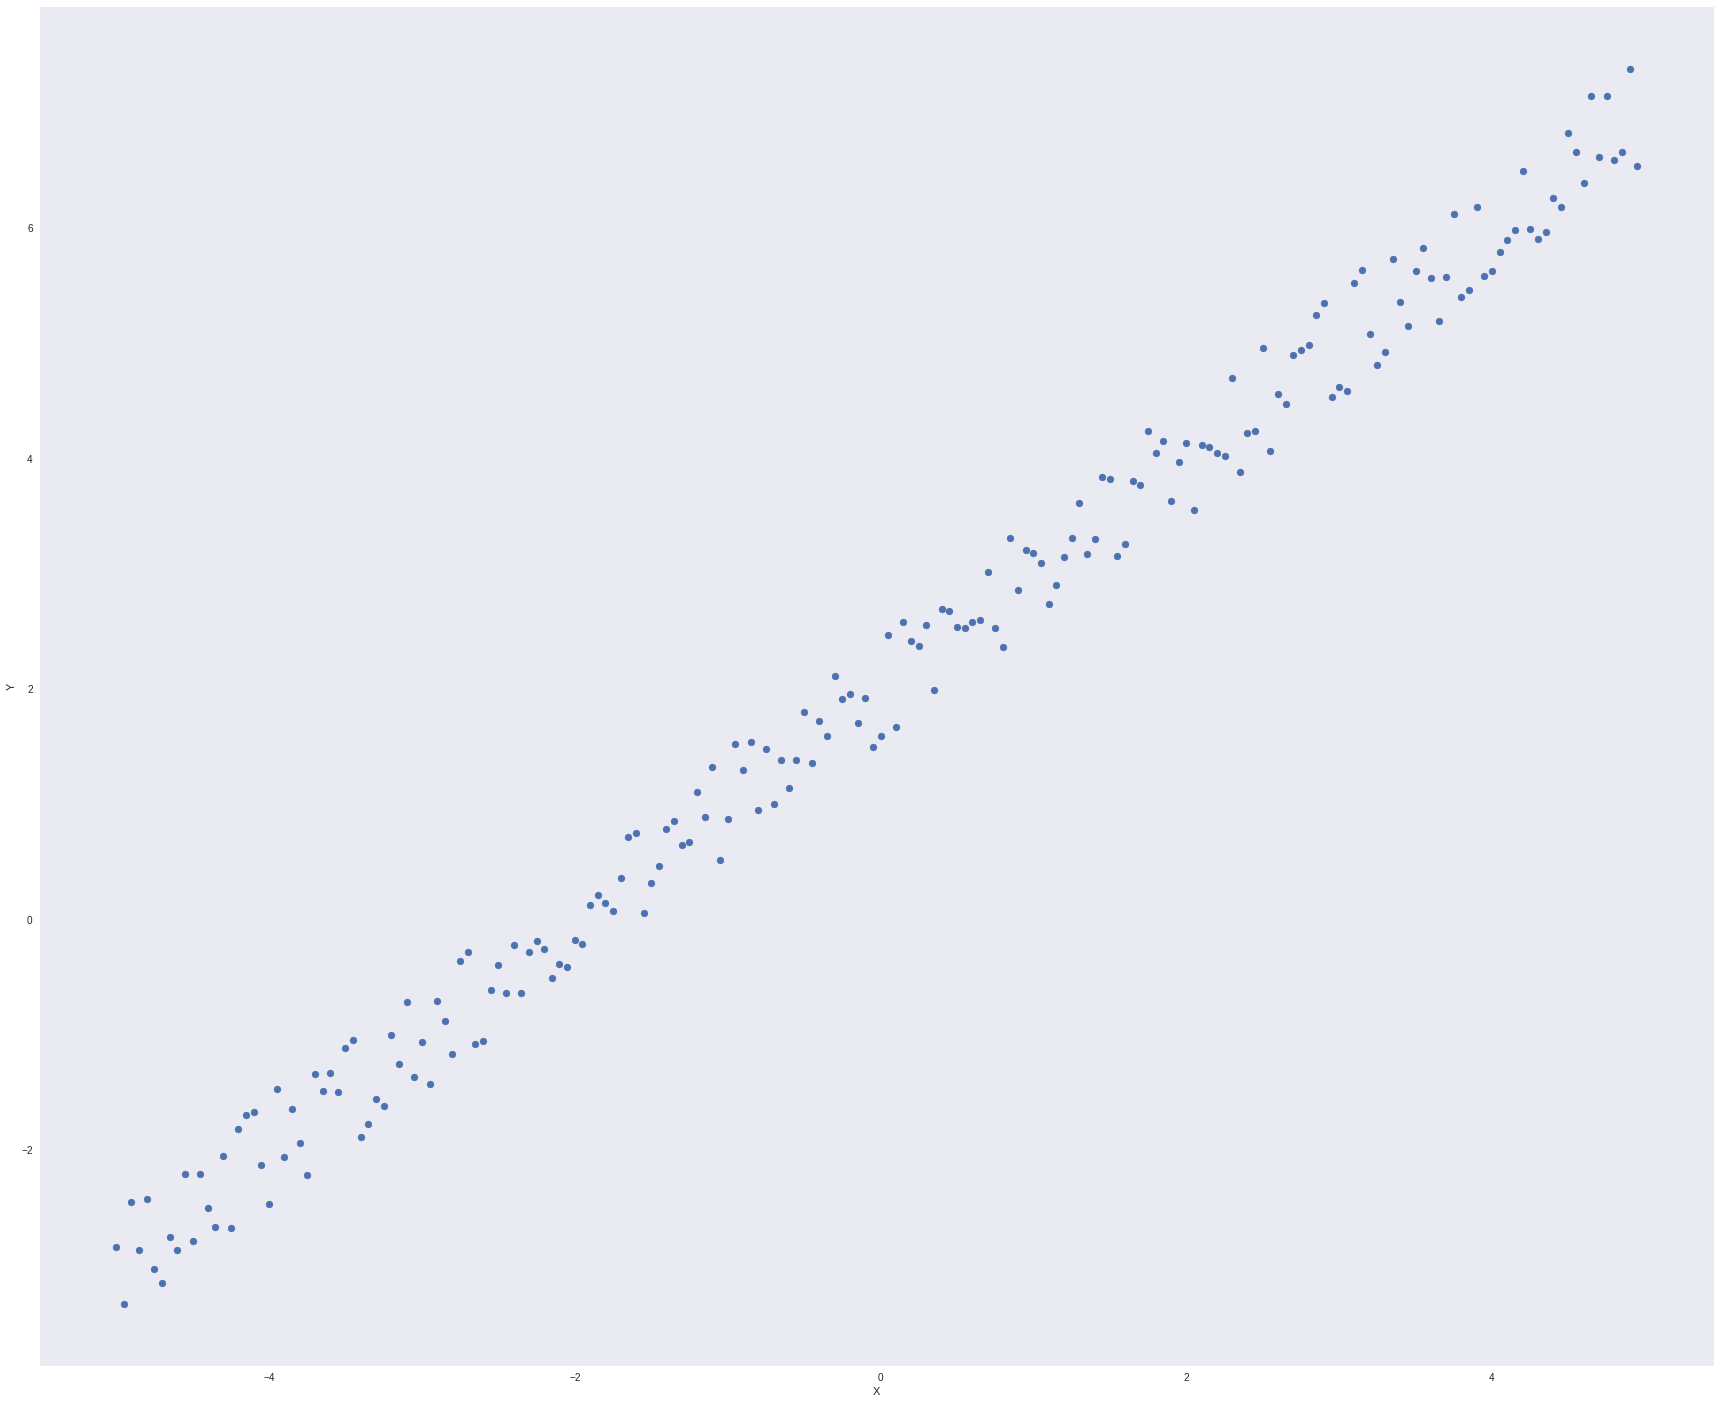

Interpolating rect:
y = 1.00x +  2
Absolute error: 51.43


In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize


# 재현성을 위한 시드 설정
np.random.seed(1000)

# 샘플의 개수
nb_samples = 200

# 손실함수 정의
def loss(v):
    e = 0.0
    for i in range(nb_samples):
        e += np.square(v[0] + v[1]*X[i] - Y[i])
    return 0.5 * e

# 미분함수 정의(원래함수, 1차미분함수)
def gradient(v):
    g = np.zeros(shape=2)
    for i in range(nb_samples):
        g[0] += (v[0] + v[1]*X[i] - Y[i])
        g[1] += ((v[0] + v[1]*X[i] - Y[i]) * X[i])
    return g

# 데이터셋 보여주기
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.scatter(X, Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.grid()

    plt.show()


if __name__ == '__main__':
    # 데이터셋 생성
    X = np.arange(-5, 5, 0.05)

    Y = X + 2
    Y += np.random.uniform(-0.5, 0.5, size=nb_samples)

    # 데이터셋 보여주기
    show_dataset(X, Y)

    # 손실함수 최소화
    result = minimize(fun=loss, x0=np.array([0.0, 0.0]), jac=gradient, method='L-BFGS-B')

    print('Interpolating rect:')
    print('y = %.2fx + %2.f' % (result.x[1], result.x[0]))

    # 절대오차 계산(absolute error)
    err = 0.0

    for i in range(nb_samples):
        err += np.abs(Y[i] - (result.x[1]*X[i] + result.x[0]))

    print('Absolute error: %.2f' % err)